In [5]:
using DifferentialEquations
using Plots

#This is for the Desktop******

In [48]:
function make_TOV(ρ₀, P, dP)
    function TOV_equations!(du, u, par, r)
        myRho = u[1]
        myM = u[2]
        myP = P(myRho)
        mydP = dP(myRho)
        
        if r <= 0.0
            du[1] = 0.0
            du[2] = 0.0
        else

        # TODO: r = 0  ****CHECK BY PLOTTING TOV FIRST****
        #du[1] = -(u[2] + 4π*r^3 *Pressure*(u[1] +(Pressure)) / (r*(r - 2*u[2]))) * dPressure^(-1)
        #du[2] = (4π*r^2)*u[1]
        
            du[1] = -((myM + 4π*(r^3)*myP)*(myRho + myP)) / (r*(r - 2*myM)) * (1/mydP) # FIXME
            du[2] = (4π*r^2)*myRho # FIXME      
        
        end
    end
    u0 = [ρ₀, 0.0];
    Rmin = 0.0; Rguess = 20.0; # FIXME
    prob = ODEProblem(TOV_equations!, u0, (Rmin, Rguess))
    TOV = init(prob, Tsit5(), dtmax = 1.0e-3, reltol=1e-8, absotol=1e-15)
    while true
        step!(TOV)
        if TOV.u[1] < 0.0 #zero ****look at ODE****
            break
        end
    end
    # TODO: surface treatment
    R = TOV.t
    return TOV.sol, R
end

make_TOV (generic function with 1 method)

11/10: To do list:

1) surface treatment
2) Comparison with Python TOV
3) realistic EOS

In [49]:
function make_TOV_sequence(ρc, P, dP) #lower case start, capital for variables
    mass = []
    radius = []
    for ρ₀ in ρc
        TOV,R = make_TOV(ρ₀, P, dP)
        push!(mass, TOV(R)[2])
        push!(radius,R)
    end
    return mass, radius
end
    

make_TOV_sequence (generic function with 1 method)

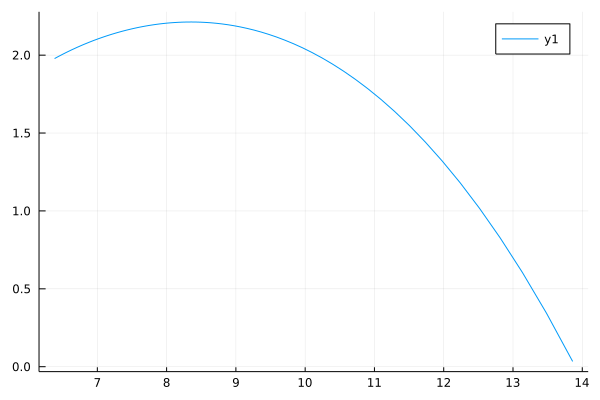

In [53]:
ρ₀ = collect(1.0e-5:1.0e-4:1.0e-2) #[1.0,2.0,3.0,4.0,5.0] # collect(10^-5:0.0001:0.004)
k = 123; γ = 2

P(ρ) = k*ρ^γ
dP(ρ) = γ*P(ρ)/ρ

M,R = make_TOV_sequence(ρ₀, P, dP)

plot(R, M)

#print(M,R)


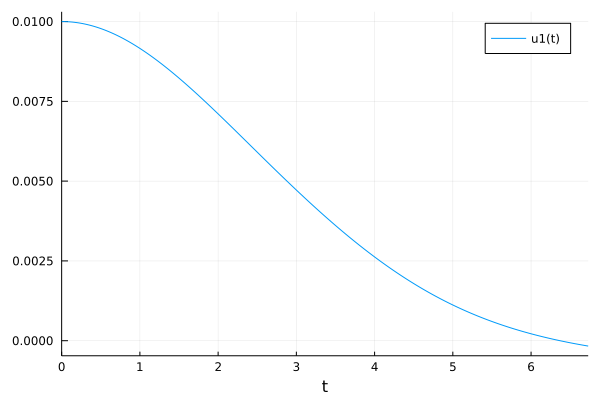

In [44]:
k = 123.0; γ = 2.0

P(ρ) = k*ρ^γ
dP(ρ) = γ*P(ρ)/ρ

TOV, R = make_TOV(1.0e-2, P, dP)

plot(TOV, vars = 1) #(RADIUS, DENSITY)


In [24]:
print(R * 1.4)

8.916600000140646

In [23]:
print(TOV(R)[2])

1.9750811527884737

In [11]:
function make_TOV(ρ₀, P, dP)
    function TOV_equations!(du, u, par, r)
        myRho = u[1]
        myM = u[2]
        myP = P(myRho)
        mydP = dP(myRho)

        # TODO: r = 0  ****CHECK BY PLOTTING TOV FIRST****
        du[1] = -(myM + 4π*r^3 *(myP)*(myRho + myP) / (r*(r - (2*myM)))) * (1/mydP) # FIXME
        du[2] = (4π*r^2)*myRho # FIXME    
    end
    u0 = [ρ₀, 0];
    Rmin = 0.01; Rguess = 20.0; # FIXME
    prob = ODEProblem(TOV_equations!, u0, (Rmin, Rguess))
    TOV = init(prob, Tsit5(), reltol=1e-8, absotol=1e-6)
    while true
        step!(TOV)
        if TOV.u[1] < 0 #zero ****look at ODE****
            break
        end
    end
    # TODO: surface treatment
    R = TOV.t
    return TOV.sol(R)[2], R 
end

make_TOV (generic function with 1 method)